In [8]:
import matplotlib.pyplot as plt
import matplotlib as mpl # 한글 폰트 설정 (NanumGothic) 
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지
import seaborn as sns
import pandas as pd
import numpy as np 
import scipy.stats as stats
data_df = pd.read_csv('../../datasets/indian-personal-finance-and-spending-habits.csv')
data_df.head()

,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,...,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
0,44637.249636,49,0,Self_Employed,Tier_1,13391.174891,0.000000,2206.490129,6658.768341,2636.970696,...,6200.537192,11265.627707,1685.696222,328.895281,465.769172,195.151320,678.292859,67.682471,0.000000,85.735517
1,26858.596592,34,2,Retired,Tier_2,5371.719318,0.000000,869.522617,2818.444460,1543.018778,...,1923.176434,9676.818733,540.306561,119.347139,141.866089,234.131168,286.668408,6.603212,56.306874,97.388606
2,50367.605084,35,1,Student,Tier_3,7555.140763,4612.103386,2201.800050,6313.222081,3221.396403,...,7050.360422,13891.450624,1466.073984,473.549752,410.857129,459.965256,488.383423,7.290892,106.653597,138.542422
3,101455.600247,21,0,Self_Employed,Tier_3,15218.340037,6809.441427,4889.418087,14690.149363,7106.130005,...,16694.965136,31617.953615,1875.932770,762.020789,1241.017448,320.190594,1389.815033,193.502754,0.000000,296.041183
4,24875.283548,52,4,Professional,Tier_2,4975.056710,3112.609398,635.907170,3034.329665,1276.155163,...,1874.099434,6265.700532,788.953124,68.160766,61.712505,187.173750,194.117130,47.294591,67.388120,96.557076


### 제안 5: 도시 등급에 따른 소비 및 저축 행동 분석
- 문제 정의
  - 도시 등급(Tier_1, Tier_2, Tier_3)에 따라 소비 및 저축 행동의 차이를 분석합니다.
- 분석 목표
  - 도시 등급별 주요 지출 항목의 평균값을 비교합니다.
  - 도시 등급별 소비 습관과 저축 비율의 차이를 확인합니다.
  - 도시 등급별 절약 가능성이 높은 항목을 식별합니다.
- 배경
  - 이를 통해 지역별 맞춤형 재정 관리 및 소비 최적화 방안을 제시할 수 있습니다.

### 목표.1
- 도시 등급별 주요 지출 항목의 평균값을 비교합니다.
  - City_Tier , object
  - major_expenses, 주요지출 (Income - Disposable_Income)
    - Rent, float64, 임대료
    - Loan_Repayment, float64, 대출 상환금
    - Insurance, float64, 보험료 
    - Groceries, float64, 식료품비
    - Transport, float64, 교통비
    - Eating_Out, float64, 외식비
    - Entertainment, float64, 오락비
    - Utilities, float64, 공과금
    - Healthcare, float64, 의료비
    - Education, float64, 교육비
    - Miscellaneous, float64, 기타 지출

In [9]:
data_df['major_expenses'] = data_df['Income'] - data_df['Disposable_Income']

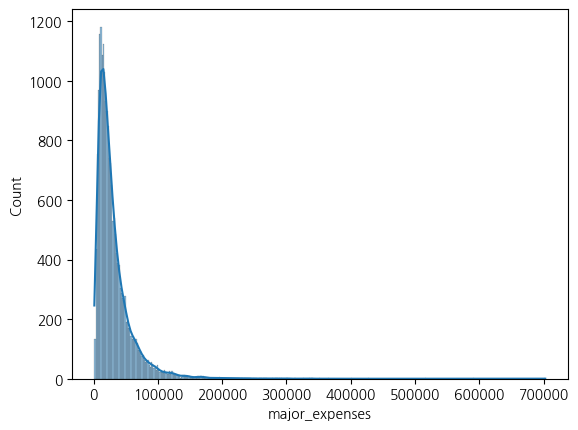

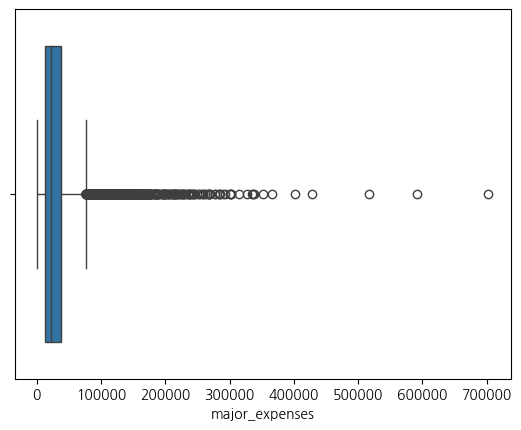

In [10]:
sns.histplot(data=data_df, x='major_expenses', kde=True)
plt.show()
sns.boxplot(data=data_df, x='major_expenses')
plt.show()

In [11]:
city_stats = data_df.groupby('City_Tier')['major_expenses'].describe()
print("\n도시 등급별 주요 지출 통계:")
print(city_stats)


도시 등급별 주요 지출 통계:
             count          mean           std          min           25%  \
City_Tier                                                                   
Tier_1      5934.0  33912.493262  32476.053163  1137.103539  14364.332759   
Tier_2     10068.0  30227.245326  29643.293782  1055.068764  12652.895473   
Tier_3      3998.0  28313.640818  27510.803637   988.427114  11642.480183   

                    50%           75%            max  
City_Tier                                             
Tier_1     24395.188923  42245.121610  401875.953968  
Tier_2     21988.919399  37708.758796  702668.155036  
Tier_3     20036.168654  35055.230159  428062.168154  


In [12]:
avg_by_city = data_df.groupby('City_Tier')['major_expenses'].mean().sort_values(ascending=False)
print("\n도시 등급별 평균 지출액:")
print(avg_by_city)



도시 등급별 평균 지출액:
City_Tier
Tier_1    33912.493262
Tier_2    30227.245326
Tier_3    28313.640818
Name: major_expenses, dtype: float64


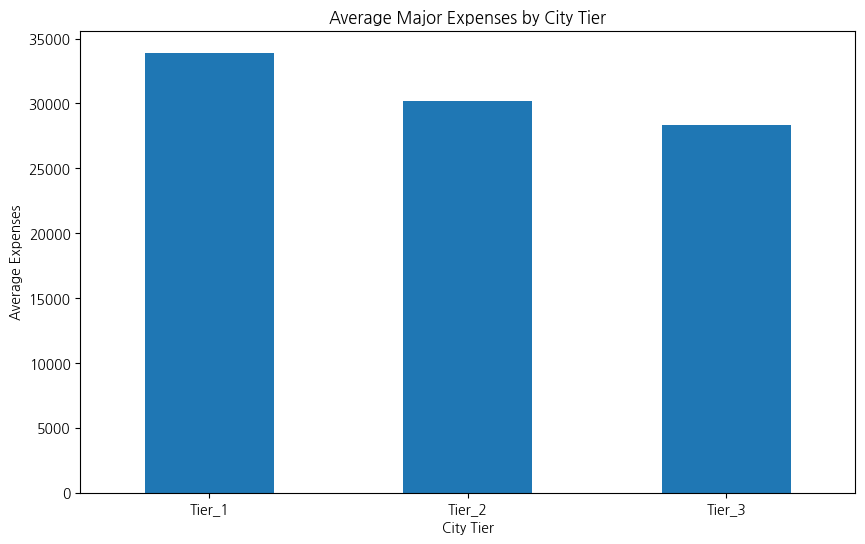

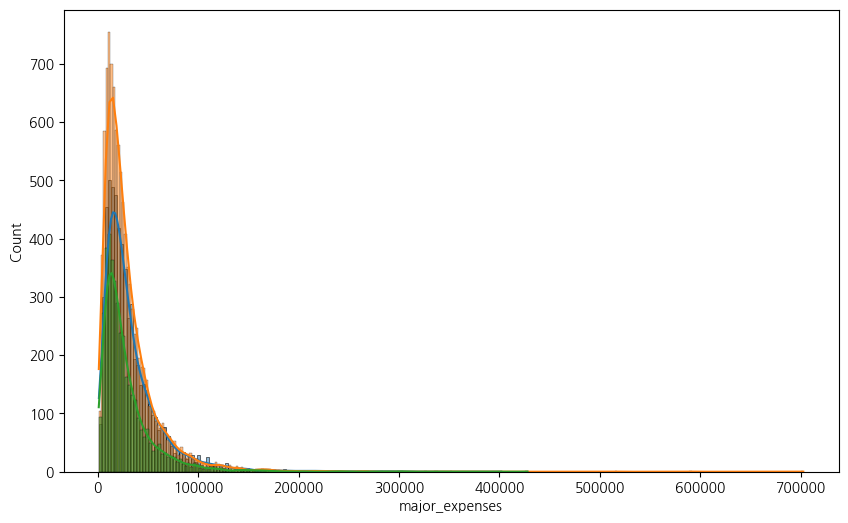

In [20]:
# 2. 바 차트로 평균값 비교
plt.figure(figsize=(10, 6))
avg_by_city.plot(kind='bar')
plt.title('Average Major Expenses by City Tier')
plt.xlabel('City Tier')
plt.ylabel('Average Expenses')
plt.xticks(rotation=0)
plt.show()

plt.figure(figsize=(10, 6))
for tier in data_df['City_Tier'].unique():
    sns.histplot(data=data_df[data_df['City_Tier']==tier]['major_expenses'], kde=True)

plt.show()

### 목표.2
- 도시 등급별 소비 습관과 저축 비율의 차이를 확인합니다.
  - City_Tier , object
  - 소비 항목
    - Rent, float64, 임대료
    - Loan_Repayment, float64, 대출 상환금
    - Insurance, float64, 보험료 
    - Groceries, float64, 식료품비
    - Transport, float64, 교통비
    - Eating_Out, float64, 외식비
    - Entertainment, float64, 오락비
    - Utilities, float64, 공과금
    - Healthcare, float64, 의료비
    - Education, float64, 교육비
    - Miscellaneous, float64, 기타 지출
  - 목표 저축률, 목표 저축액 
    - Desired_Savings , float64
    - Desired_Savings_Percentage , float64

In [21]:
expense_items = ['Rent', 'Loan_Repayment', 'Insurance', 'Groceries', 
                'Transport', 'Eating_Out', 'Entertainment', 'Utilities', 
                'Healthcare', 'Education', 'Miscellaneous']

# 각 지출 항목별 도시 등급 비교
city_expenses = data_df.groupby('City_Tier')[expense_items].mean()
print("\n도시 등급별 지출 항목 평균:")
print(city_expenses)


도시 등급별 지출 항목 평균:
                   Rent  Loan_Repayment    Insurance    Groceries  \
City_Tier                                                           
Tier_1     12320.517019     2038.067764  1449.456731  5145.997954   
Tier_2      8342.642141     2062.590409  1455.577849  5214.862936   
Tier_3      6304.708231     2035.005373  1461.916256  5271.075027   

             Transport   Eating_Out  Entertainment    Utilities   Healthcare  \
City_Tier                                                                      
Tier_1     2673.731634  1437.403507    1425.165051  2470.979031  1642.228495   
Tier_2     2711.042395  1467.438830    1457.183765  2515.100932  1670.562128   
Tier_3     2733.525601  1484.095316    1463.035915  2529.943299  1675.195722   

             Education  Miscellaneous  
City_Tier                              
Tier_1     2487.245367     821.700709  
Tier_2     2498.943079     831.300863  
Tier_3     2513.330542     841.809537  


<Figure size 1500x800 with 0 Axes>

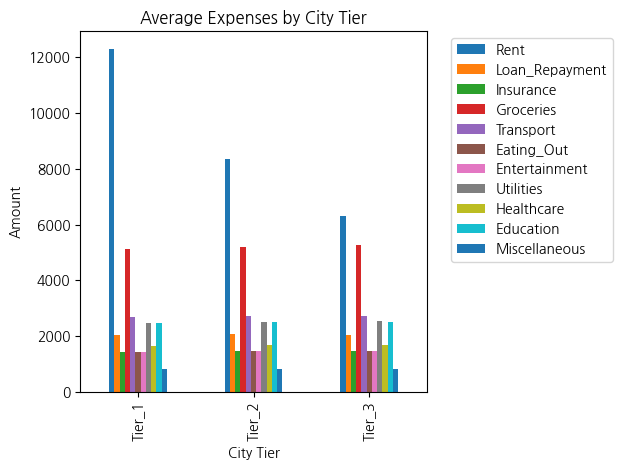

In [22]:
# 시각화
plt.figure(figsize=(15, 8))
city_expenses.plot(kind='bar')
plt.title('Average Expenses by City Tier')
plt.xlabel('City Tier')
plt.ylabel('Amount')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

In [23]:
savings_analysis = data_df.groupby('City_Tier').agg({
    'Desired_Savings_Percentage': 'mean',  # 목표 저축률
    'Desired_Savings': 'mean',            # 목표 저축액
    'Income': 'mean',                     # 평균 수입
    'Disposable_Income': 'mean'           # 평균 가처분소득
}).round(2)

# 실제 저축 가능액 추정
savings_analysis['Estimated_Savings'] = (
    savings_analysis['Income'] * 
    savings_analysis['Desired_Savings_Percentage'] / 100
)

print("\n도시 등급별 저축 관련 지표:")
print(savings_analysis)


도시 등급별 저축 관련 지표:
           Desired_Savings_Percentage  Desired_Savings    Income  \
City_Tier                                                          
Tier_1                           9.77          4406.66  41068.39   
Tier_2                           9.81          5172.18  41713.21   
Tier_3                           9.85          5361.42  42031.39   

           Disposable_Income  Estimated_Savings  
City_Tier                                        
Tier_1               7155.90        4012.381703  
Tier_2              11485.97        4092.065901  
Tier_3              13717.75        4140.091915  



도시 등급별 저축 가능성 분석:
           Disposable_Income  Desired_Savings  can_save  savings_margin  \
City_Tier                                                                 
Tier_1               7155.90          4406.66      0.98         2749.24   
Tier_2              11485.97          5172.18      1.00         6313.78   
Tier_3              13717.75          5361.42      1.00         8356.33   

           can_save_percentage  
City_Tier                       
Tier_1                    98.0  
Tier_2                   100.0  
Tier_3                   100.0  


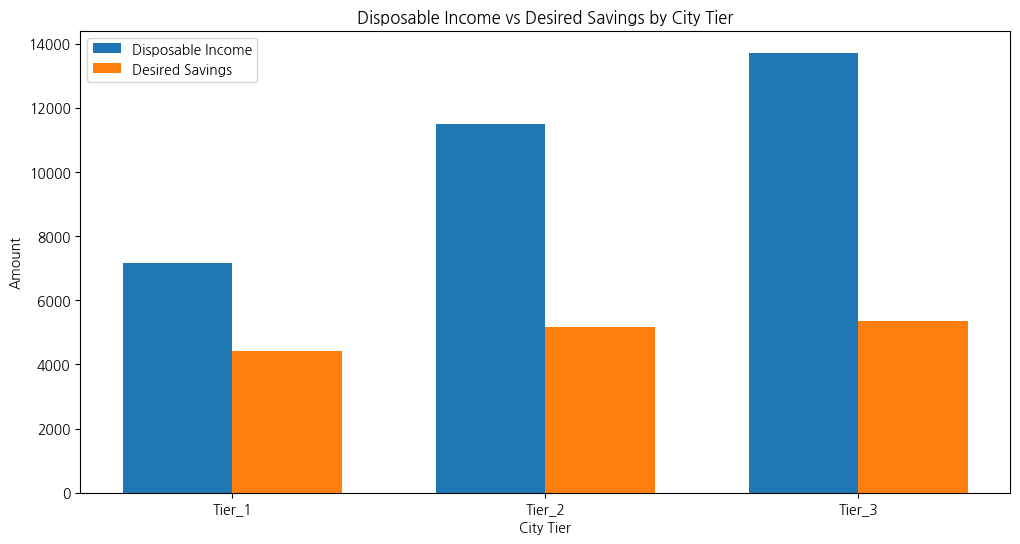

In [24]:
# 저축 가능성 분석
data_df['can_save'] = data_df['Disposable_Income'] >= data_df['Desired_Savings']
data_df['savings_margin'] = data_df['Disposable_Income'] - data_df['Desired_Savings']

# 도시별 분석
city_savings_analysis = data_df.groupby('City_Tier').agg({
    'Disposable_Income': 'mean',
    'Desired_Savings': 'mean',
    'can_save': 'mean',  # True의 비율
    'savings_margin': 'mean'
}).round(2)

# 백분율로 변환
city_savings_analysis['can_save_percentage'] = (city_savings_analysis['can_save'] * 100)

print("\n도시 등급별 저축 가능성 분석:")
print(city_savings_analysis)

# 시각화
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(city_savings_analysis.index))

plt.bar(index, city_savings_analysis['Disposable_Income'], bar_width, 
        label='Disposable Income')
plt.bar(index + bar_width, city_savings_analysis['Desired_Savings'], bar_width,
        label='Desired Savings')

plt.title('Disposable Income vs Desired Savings by City Tier')
plt.xlabel('City Tier')
plt.ylabel('Amount')
plt.xticks(index + bar_width/2, city_savings_analysis.index)
plt.legend()
plt.show()


도시 등급별 저축 분석:
           Disposable_Income  Desired_Savings  savings_margin_ratio  \
City_Tier                                                             
Tier_1               7155.90          4406.66                 42.55   
Tier_2              11485.97          5172.18                 60.64   
Tier_3              13717.75          5361.42                 67.58   

           desired_savings_ratio  
City_Tier                         
Tier_1                     57.45  
Tier_2                     39.36  
Tier_3                     32.42  


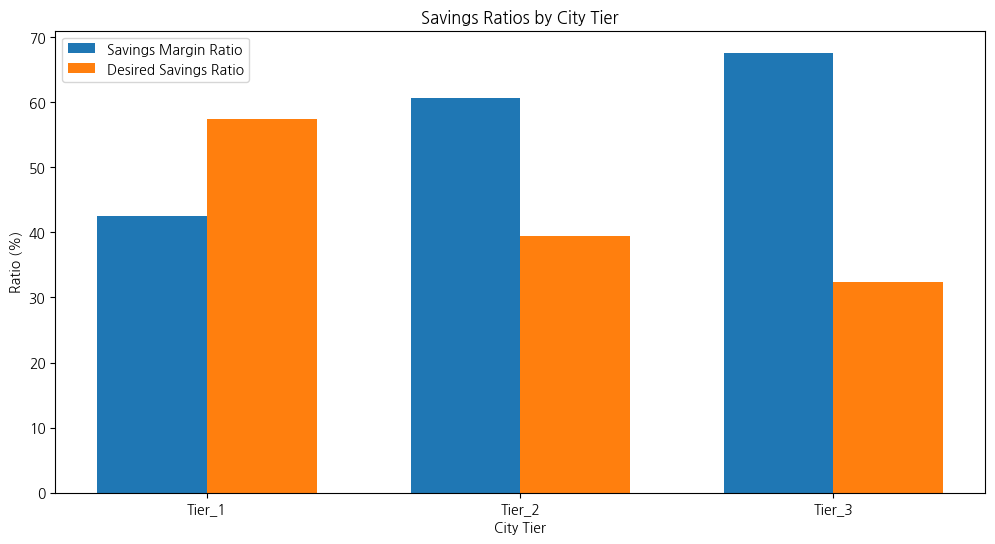

In [26]:
# 비율 계산
data_df['savings_margin_ratio'] = (data_df['savings_margin'] / data_df['Disposable_Income']) * 100
data_df['desired_savings_ratio'] = (data_df['Desired_Savings'] / data_df['Disposable_Income']) * 100

# 도시별 분석
city_savings_analysis = data_df.groupby('City_Tier').agg({
    'Disposable_Income': 'mean',
    'Desired_Savings': 'mean',
    'savings_margin_ratio': 'mean',
    'desired_savings_ratio': 'mean'
}).round(2)

print("\n도시 등급별 저축 분석:")
print(city_savings_analysis)

# 시각화
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(city_savings_analysis.index))

plt.bar(index, city_savings_analysis['savings_margin_ratio'], bar_width, 
        label='Savings Margin Ratio')
plt.bar(index + bar_width, city_savings_analysis['desired_savings_ratio'], bar_width,
        label='Desired Savings Ratio')

plt.title('Savings Ratios by City Tier')
plt.xlabel('City Tier')
plt.ylabel('Ratio (%)')
plt.xticks(index + bar_width/2, city_savings_analysis.index)
plt.legend()
plt.show()

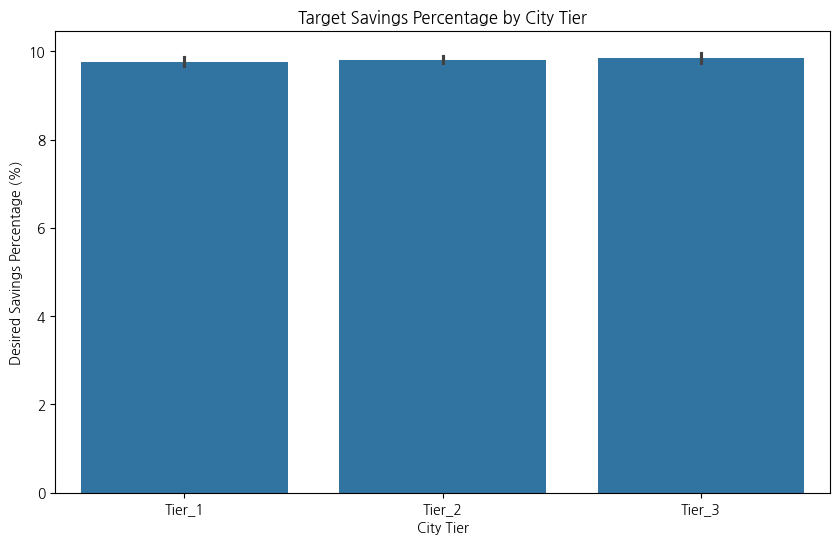

In [27]:
# 1. 기본 막대 그래프
plt.figure(figsize=(10, 6))
sns.barplot(data=data_df, x='City_Tier', y='Desired_Savings_Percentage')
plt.title('Target Savings Percentage by City Tier')
plt.xlabel('City Tier')
plt.ylabel('Desired Savings Percentage (%)')
plt.show()